## Importing Libraries

In [184]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from prettytable import PrettyTable

# colors
colors = ['#F0D290','#DE834D','#A3423C','#781D42']
colors2 = ['#F0D290','#DE834D','#A3423C','#781D42','#671E31']
colors3 = ['#f0d290','#e9c083','#e2af77','#d99d6d','#d08c64', '#c67b5d',
           '#bc6b56','#b05a51','#a34b4d','#963b49', '#872c45','#781d42']

import warnings
warnings.filterwarnings("ignore")

## Loading data

In [185]:
df1 = pd.read_csv(r"D:\Downloadsnew\pizza sales dataset\order_details.csv")
df2 = pd.read_csv(r"D:\Downloadsnew\pizza sales dataset\orders.csv")
df3 = pd.read_csv(r"D:\Downloadsnew\pizza sales dataset\pizza_types.csv", encoding='unicode_escape')
df4 = pd.read_csv(r"D:\Downloadsnew\pizza sales dataset\pizzas.csv")

#### Consolidate the Dataframes

In [186]:
merge1= df1.merge(df2,how='inner',on=['order_id'])

In [187]:
merge1.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [188]:
merge2 = df3.merge(df4, how = 'inner', on = ['pizza_type_id'])

In [189]:
merge2.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_s,S,12.75
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_m,M,16.75


In [190]:
df = merge1.merge(merge2, how = 'inner', on = ['pizza_id'])

In [191]:
df.to_csv('final_pizza.csv',index= True)

In [192]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25


## Data overview

In [193]:
df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [194]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'name', 'category', 'ingredients', 'size', 'price'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  size              48620 non-null  object 
 11  price             48620 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


## Exploring for NULL data

In [196]:
df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
name                0
category            0
ingredients         0
size                0
price               0
dtype: int64

#### Data type Conversion

In [197]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time

# df["datetime"] = df["date"] + df["time"]
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str) )

In [198]:
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price,datetime
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-01 11:38:36
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-02 12:22:46
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-03 14:22:10
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-03 16:54:54
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-04 20:55:29


In [199]:
df['name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

## Exploratory Data Analysis EDA

First things first, let's drop all the columns that pose to be irrelevant for our EDA purposes.

In [200]:
df.drop(['order_details_id'], axis = 1, inplace = True)

In [201]:
df.head()

,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price,datetime
0,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-01 11:38:36
1,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-02 12:22:46
2,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-03 14:22:10
3,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-03 16:54:54
4,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-04 20:55:29


#### Next, we are going to check if there are any duplicate entries in the dataset and drop those.

In [202]:
df.duplicated().sum()

0

## Univariate Analysis

### Categorical Featrues

#### pizza_id_counts

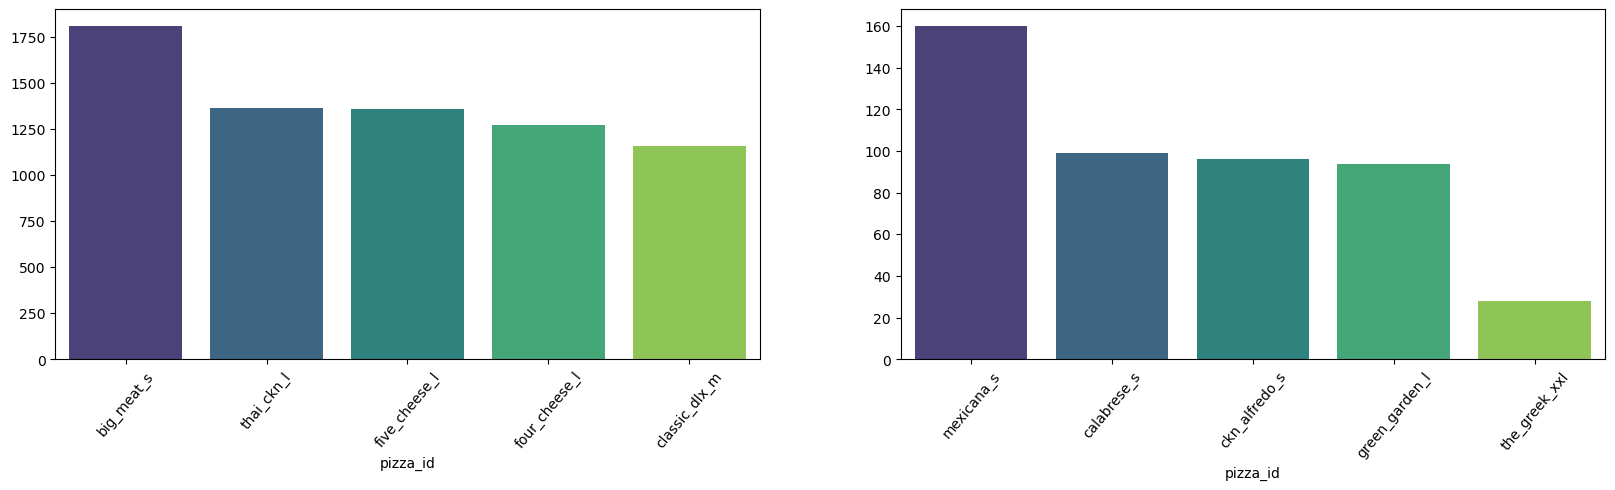

In [203]:
plt.figure(1, figsize = (20,10))

plt.subplot(221)
pizza_id_counts = df['pizza_id'].value_counts().head()
sns.barplot(x = pizza_id_counts.index, y= pizza_id_counts.values,  palette="viridis")
plt.xticks(rotation=50)

plt.subplot(222)
pizza_id_counts = df['pizza_id'].value_counts().tail()
sns.barplot(x = pizza_id_counts.index, y= pizza_id_counts.values,  palette="viridis")
plt.xticks(rotation=50)
plt.show()


#### Top 5 Most Common Pizza IDs (Left Plot):
- This bar plot shows the five most frequently ordered pizza IDs (pizza_id). 
- "big_meat_5" is the most common pizza ID helps in maintaining sufficient stock and focusing promotional efforts on this popular item.
#### 5 Least Common Pizza IDs (Right Plot):
- This bar plot illustrates the five least frequently ordered pizza IDs (pizza_id).
- "the_greek_xxl" is among the least common pizza IDs can inform decisions about how to handle this item, whether through marketing strategies to boost its popularity or re-evaluating its place on the menu.

#### pizza_type_id

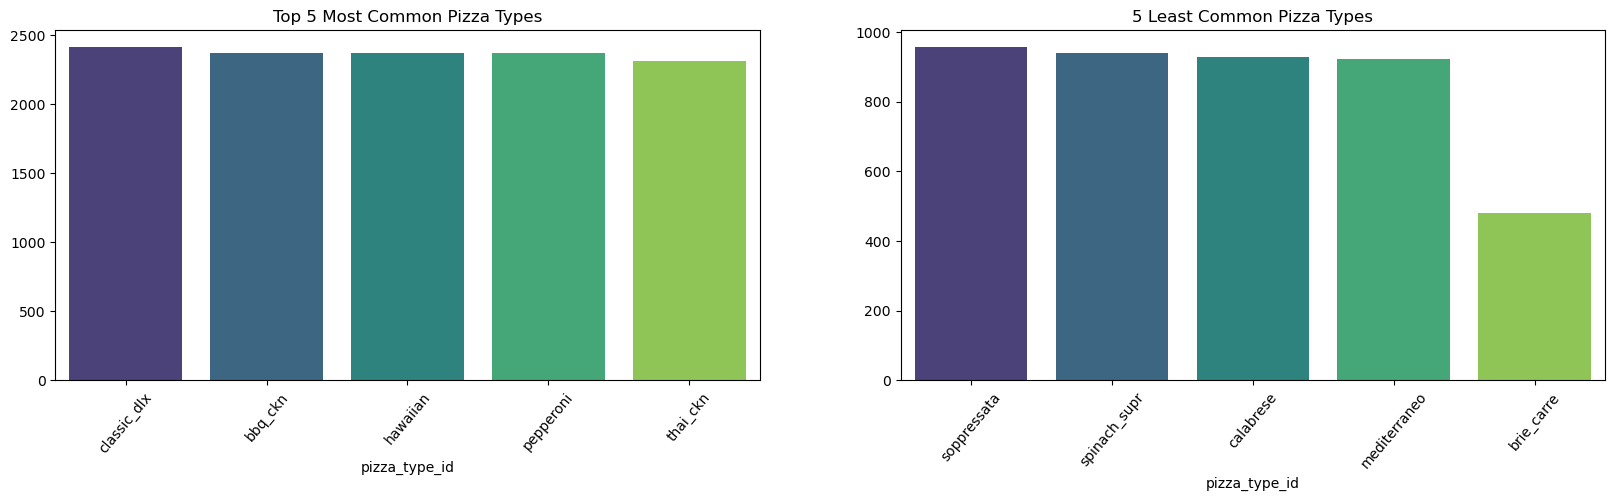

In [204]:
plt.figure(1, figsize = (20,10))

plt.subplot(221)
pizza_type_id_counts = df['pizza_type_id'].value_counts().head()
sns.barplot(x = pizza_type_id_counts.index, y= pizza_type_id_counts.values,  palette="viridis")
plt.xticks(rotation=50)
plt.title('Top 5 Most Common Pizza Types')



plt.subplot(222)
pizza_type_id_counts = df['pizza_type_id'].value_counts().tail()
sns.barplot(x = pizza_type_id_counts.index, y= pizza_type_id_counts.values,  palette="viridis")
plt.xticks(rotation=50)
plt.title('5 Least Common Pizza Types')
plt.show()


#### Top 5 Most Common Pizza Types (Left Plot):
- This bar plot displays the five most frequently ordered pizza types (pizza_type_id) in the dataset

#### 5 Least Common Pizza Types (Right Plot):
- This bar plot shows the five least frequently ordered pizza types

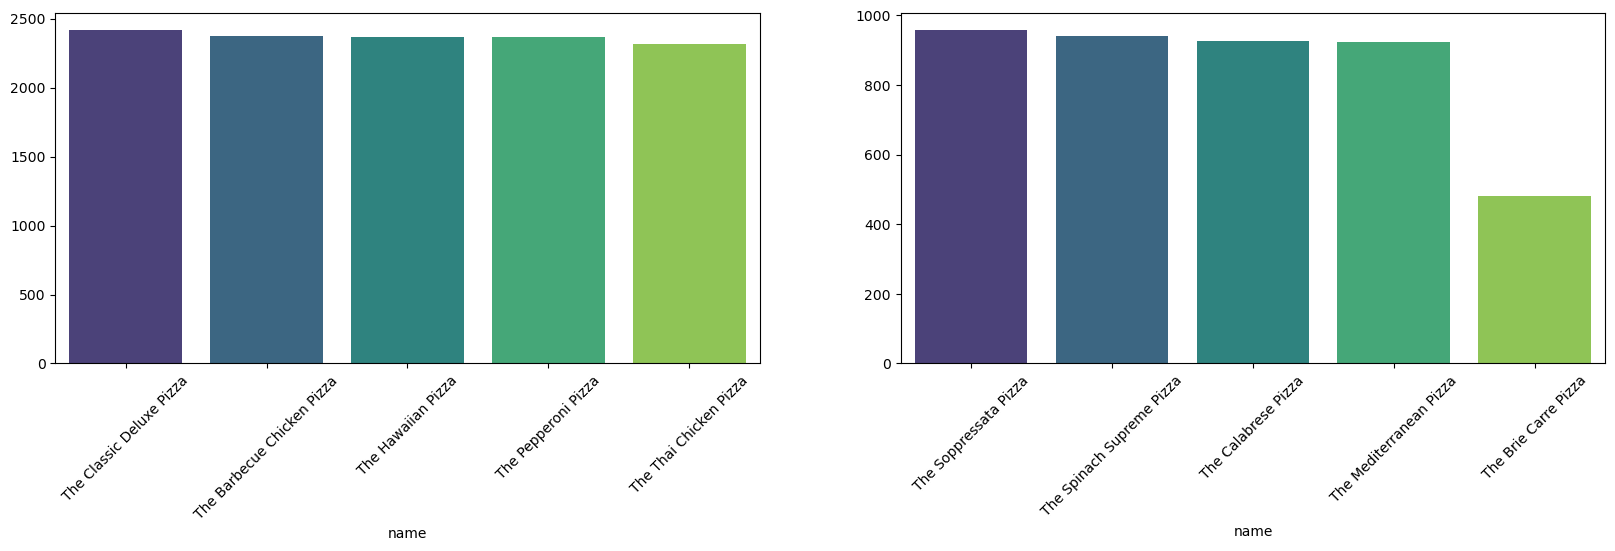

In [205]:
plt.figure(1, figsize = (20,10))

plt.subplot(221)
pizza_name_counts = df['name'].value_counts().head()
sns.barplot(x = pizza_name_counts.index, y= pizza_name_counts.values,  palette="viridis")
plt.xticks(rotation=45)


plt.subplot(222)
pizza_name_counts = df['name'].value_counts().tail()
sns.barplot(x = pizza_name_counts.index, y= pizza_name_counts.values,  palette="viridis")
plt.xticks(rotation=45)
plt.show()

#### Top 5 Most Common Pizza Names (Left Plot):
- This bar plot illustrates the five most frequently ordered pizza names (name) in the dataset.
- This plot highlights the pizzas that are most popular among customers, providing valuable insights into customer preferences.

#### 5 Least Common Pizza Names (Right Plot):

- This bar plot displays the five least frequently ordered pizza names (name).
- Each bar represents the frequency of orders for a particular pizza name, with shorter bars indicating lower popularity.
This plot helps in understanding which pizzas are not performing well in terms of sales.

#### category

Text(0.5, 1.0, 'Top Pizza Categories')

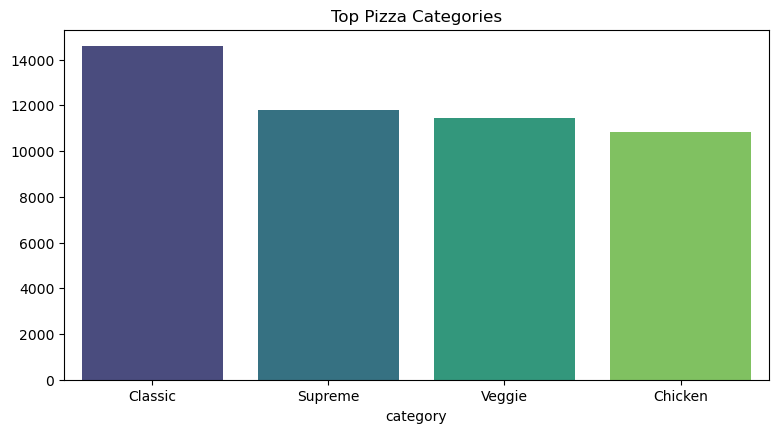

In [206]:
plt.figure(1, figsize = (20,10))

plt.subplot(221)
category_counts = df['category'].value_counts().head()
sns.barplot(x = category_counts.index, y= category_counts.values,  palette="viridis")
plt.title('Top Pizza Categories')

# plt.subplot(222)
# category_counts = df['category'].value_counts().tail()
# sns.barplot(x = category_counts.index, y= category_counts.values,  palette="viridis")
# plt.title('Bottom Pizza Categories')
# plt.show() 

- "Classic" is the most common category helps in prioritizing inventory and marketing strategies to cater to customer preferences.

<Axes: xlabel='size'>

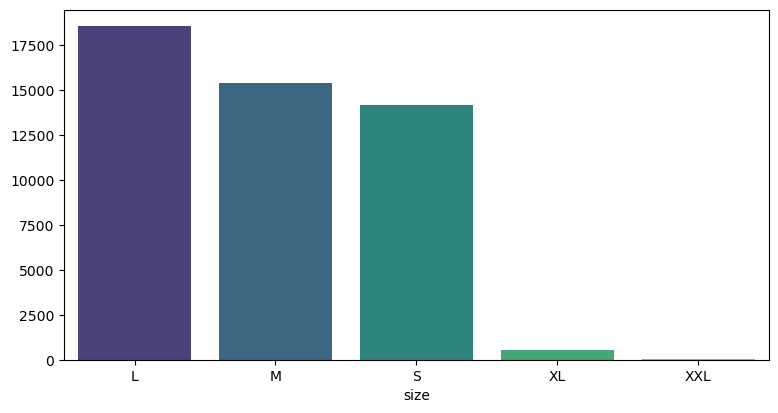

In [207]:
plt.figure(1, figsize = (20,10))

plt.subplot(221)
size_counts = df['size'].value_counts().head()
sns.barplot(x = size_counts.index, y= size_counts.values,  palette="viridis")

# plt.subplot(222)
# size_counts = df['size'].value_counts().tail()
# sns.barplot(x = size_counts.index, y= size_counts.values,  palette="viridis")
# # plt.xticks(rotation=30)
# plt.show() 

## Numerical data distribution

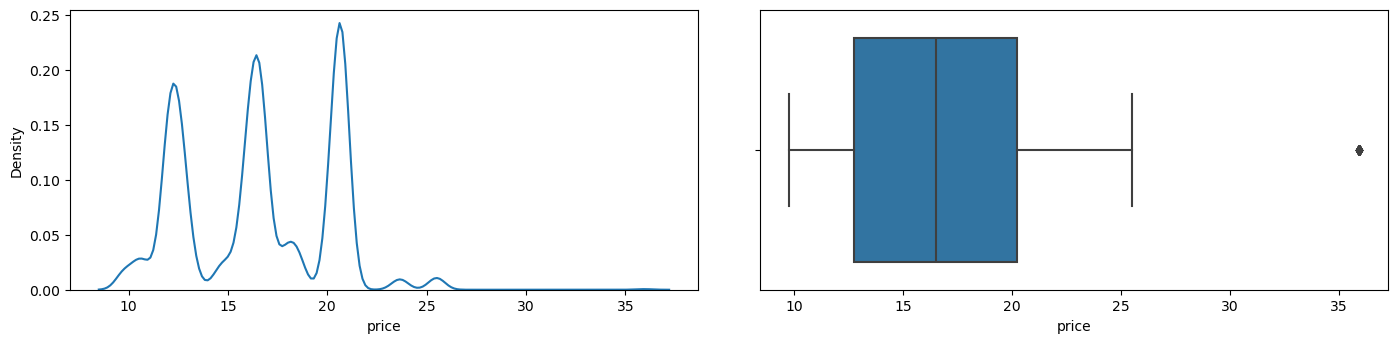

In [208]:
plt.figure(2, figsize=(17, 8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=df, x='price');

plt.subplot(222)
sns.boxplot(data=df, x='price',orient='h');

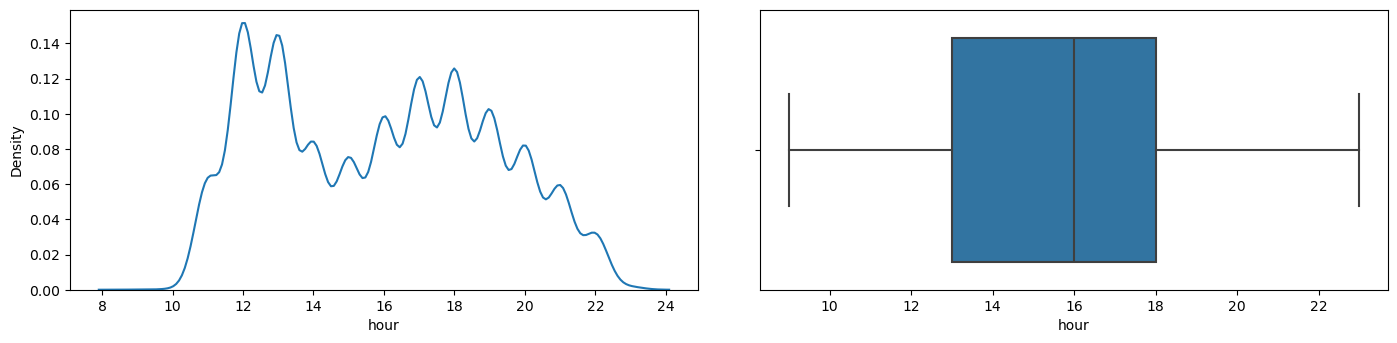

In [209]:
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

plt.figure(2, figsize=(17, 8))
plt.subplots_adjust(wspace=0.1);

plt.subplot(221)
sns.kdeplot(data=df, x='hour');

plt.subplot(222)
sns.boxplot(data=df, x='hour',orient='h');

## Bivariate Analysis

#### 1. How does the size of the pizza relate to its price?

Text(0, 0.5, 'Price')

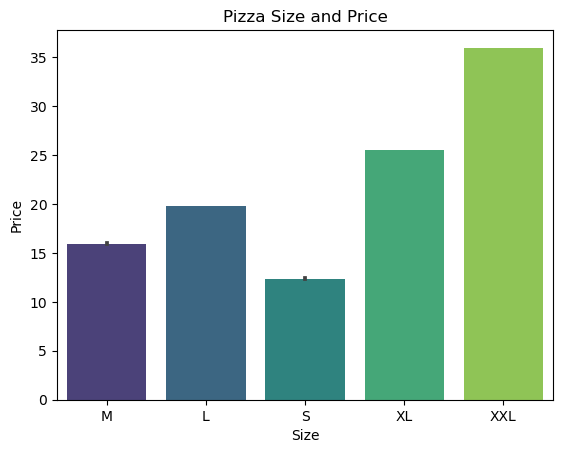

In [210]:
sns.barplot(x='size', y='price', data=df, palette="viridis")
plt.title('Pizza Size and Price')
plt.xlabel('Size')
plt.ylabel('Price')

#### From the above barplot, we typically observe that larger pizzas tend to have higher average prices compared to smaller pizzas.

####

### 2. What is the relationship between pizza category and price?

Text(0, 0.5, 'Price')

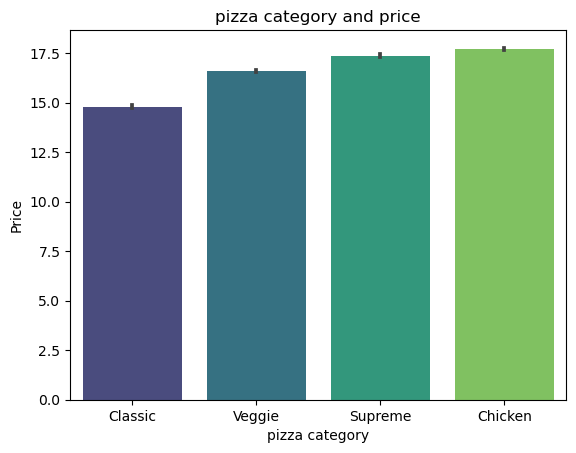

In [211]:
sns.barplot(x='category', y='price', data=df, palette="viridis")
plt.title('pizza category and price')
plt.xlabel('pizza category')
plt.ylabel('Price')

### 3. How does the quantity ordered relate to the price?

Text(0, 0.5, 'Price')

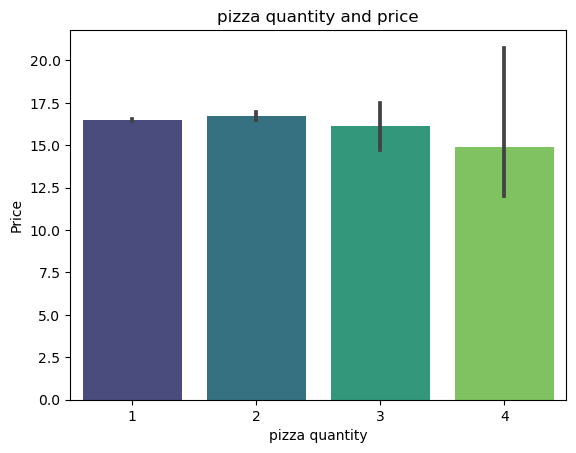

In [212]:
sns.barplot(x = 'quantity', y = 'price', data = df, palette="viridis")
plt.title('pizza quantity and price')
plt.xlabel('pizza quantity')
plt.ylabel('Price')

### 5. Price vs. Pizza Type

Text(0, 0.5, 'Price')

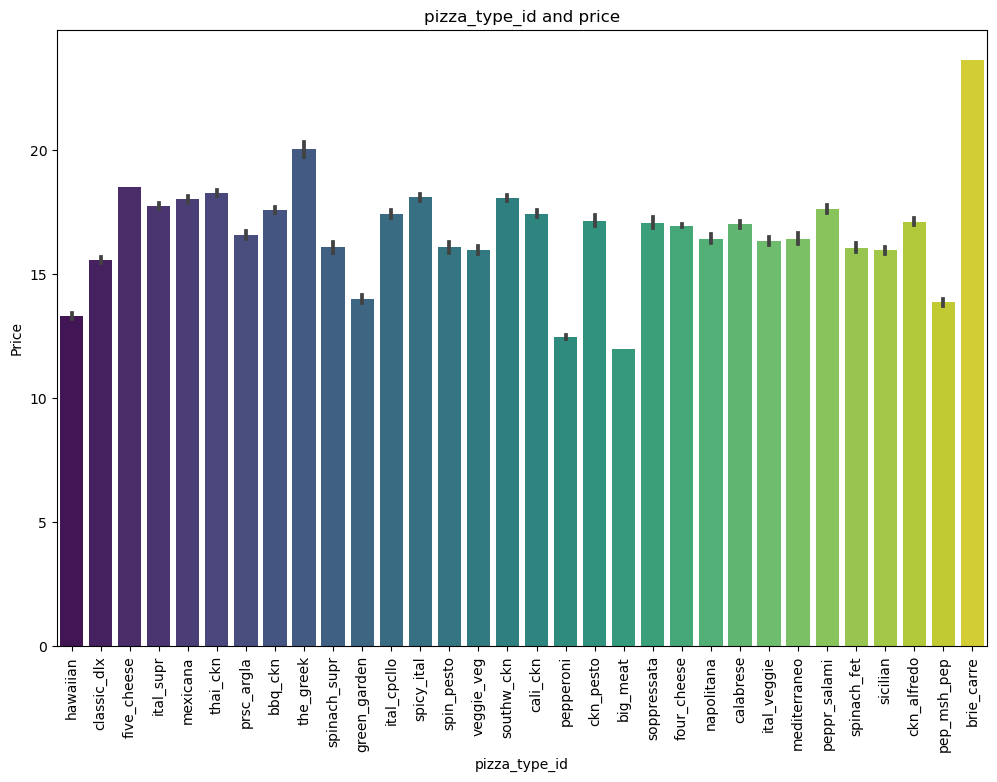

In [213]:
# Set the figure size before plotting
plt.figure(figsize=(12, 8))
sns.barplot(x = 'pizza_type_id', y = 'price', data = df, palette="viridis")
plt.title('pizza_type_id and price')
plt.xticks(rotation=90)
plt.xlabel('pizza_type_id')
plt.ylabel('Price')

## What is the busiest time in the day

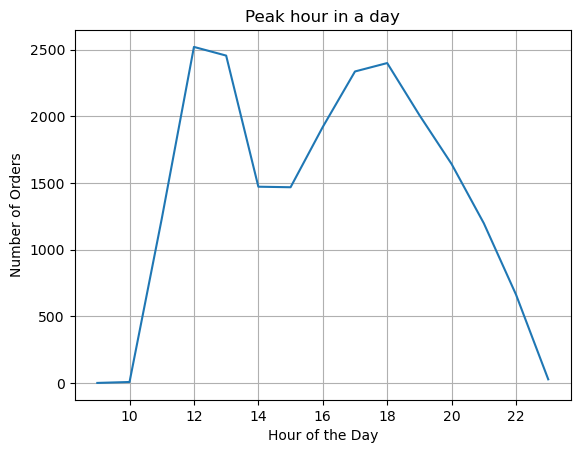

In [214]:
# df['hour'] = pd.to_datetime(df['datetime']).dt.hour

orders_per_hour = df.groupby('hour')['order_id'].nunique()

# orders_per_hour
plt.plot(orders_per_hour.index, orders_per_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Peak hour in a day')
plt.grid()
plt.show()

In [215]:
hourly_orders = df.groupby(df['datetime'].dt.hour)['order_id'].nunique()
for i, j in hourly_orders.items():
    print(f"Hour {i} : {j} orders")

Hour 9 : 1 orders
Hour 10 : 8 orders
Hour 11 : 1231 orders
Hour 12 : 2520 orders
Hour 13 : 2455 orders
Hour 14 : 1472 orders
Hour 15 : 1468 orders
Hour 16 : 1920 orders
Hour 17 : 2336 orders
Hour 18 : 2399 orders
Hour 19 : 2009 orders
Hour 20 : 1642 orders
Hour 21 : 1198 orders
Hour 22 : 663 orders
Hour 23 : 28 orders


## What are our best and worst selling pizzas

In [216]:
# Group the data by pizza type and sum the quantities
pizza_sales = df.groupby('pizza_type_id')['price'].sum()

#sorting of pizza 
pizza_sales = pizza_sales.sort_values(ascending = False)
top_pizza_sales = pizza_sales.head(10)
top_pizza_sales

pizza_type_id
thai_ckn       42332.25
bbq_ckn        41683.00
cali_ckn       40166.50
classic_dlx    37631.50
spicy_ital     34163.50
southw_ckn     34081.75
ital_supr      32856.25
hawaiian       31561.75
four_cheese    31361.10
sicilian       30123.75
Name: price, dtype: float64

Text(0.5, 1.0, 'Top 10 Most Sold as per Revenue')

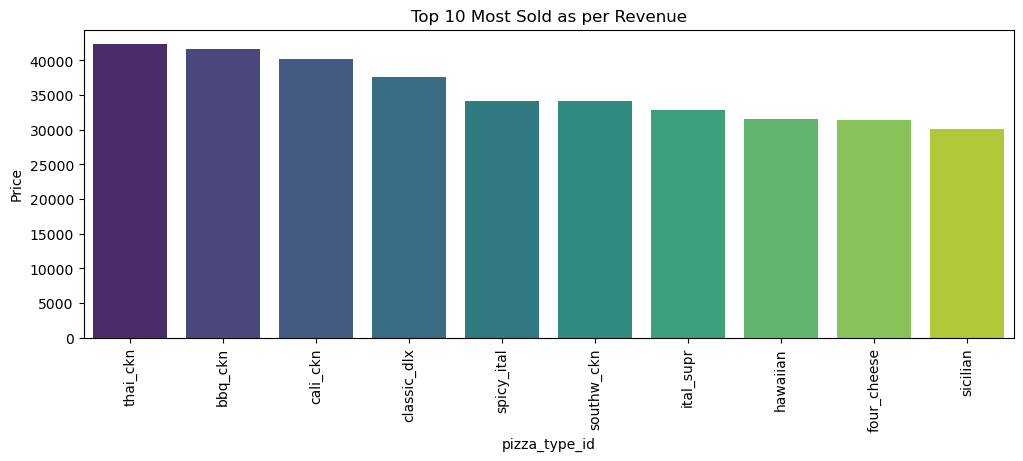

In [217]:
plt.figure(figsize=(12, 4))
sns.barplot(x = top_pizza_sales.index, y = top_pizza_sales.values, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('pizza_type_id')
plt.ylabel('Price')
plt.title('Top 10 Most Sold as per Revenue')

In [218]:
least_pizza_sales = pizza_sales.tail(10)
least_pizza_sales

pizza_type_id
ckn_alfredo     16779.00
ckn_pesto       16484.75
soppressata     16342.75
ital_veggie     15930.75
calabrese       15763.75
spin_pesto      15388.25
mediterraneo    15163.00
spinach_supr    15124.00
green_garden    13819.50
brie_carre      11352.00
Name: price, dtype: float64

Text(0.5, 1.0, 'Top 10 Least Sold as per Revenue')

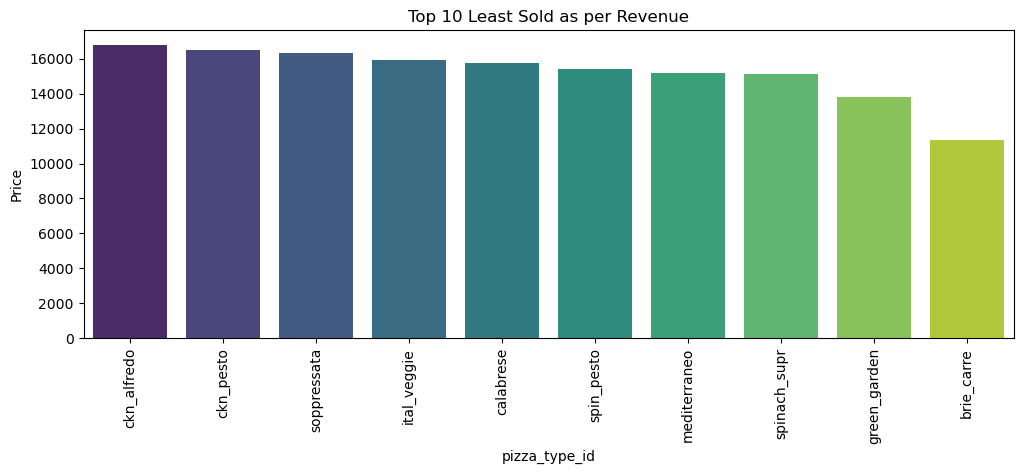

In [219]:
plt.figure(figsize=(12, 4))
sns.barplot(x = least_pizza_sales.index, y = least_pizza_sales.values, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('pizza_type_id')
plt.ylabel('Price')
plt.title('Top 10 Least Sold as per Revenue')

#### Best Selling Pizza:
- Pizza Type: thai_ckn    

#### Worst Selling Pizza:
- Pizza Type: brie_carre

#### How much money did we make this year?

In [220]:
df['price'].sum()

801944.7

- Total revenue - 801944.71

#### New column called weekday (extracted from the date column)

In [221]:
df['weekday'] = df['datetime'].dt.strftime('%A')
df1 = df.copy()
df1.drop(['datetime','hour'],axis = 1, inplace = True)
df1.to_csv('final_pizza.csv',index= True)

#### What day tends to be the engrossed?

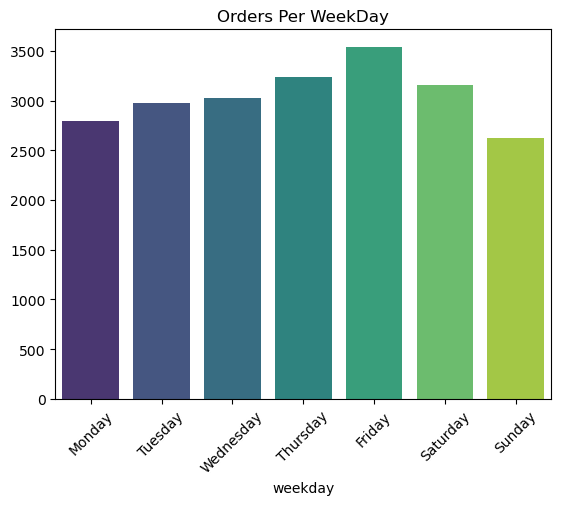

In [222]:
weekday_orders = df.groupby('weekday')['order_id'].nunique()
# week_day_order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_orders = weekday_orders.reindex(weekday_order)

sns.barplot(x = weekday_orders.index, y = weekday_orders.values,  palette="viridis" )
plt.xticks(rotation = 45)
plt.title('Orders Per WeekDay')
plt.show()

## Time Series Analysis

In [223]:
categories = df['category'].unique()
sizes = df['size'].unique()
weekdays = df['weekday'].unique()
weekdays

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Tuesday', 'Wednesday',
       'Monday'], dtype=object)

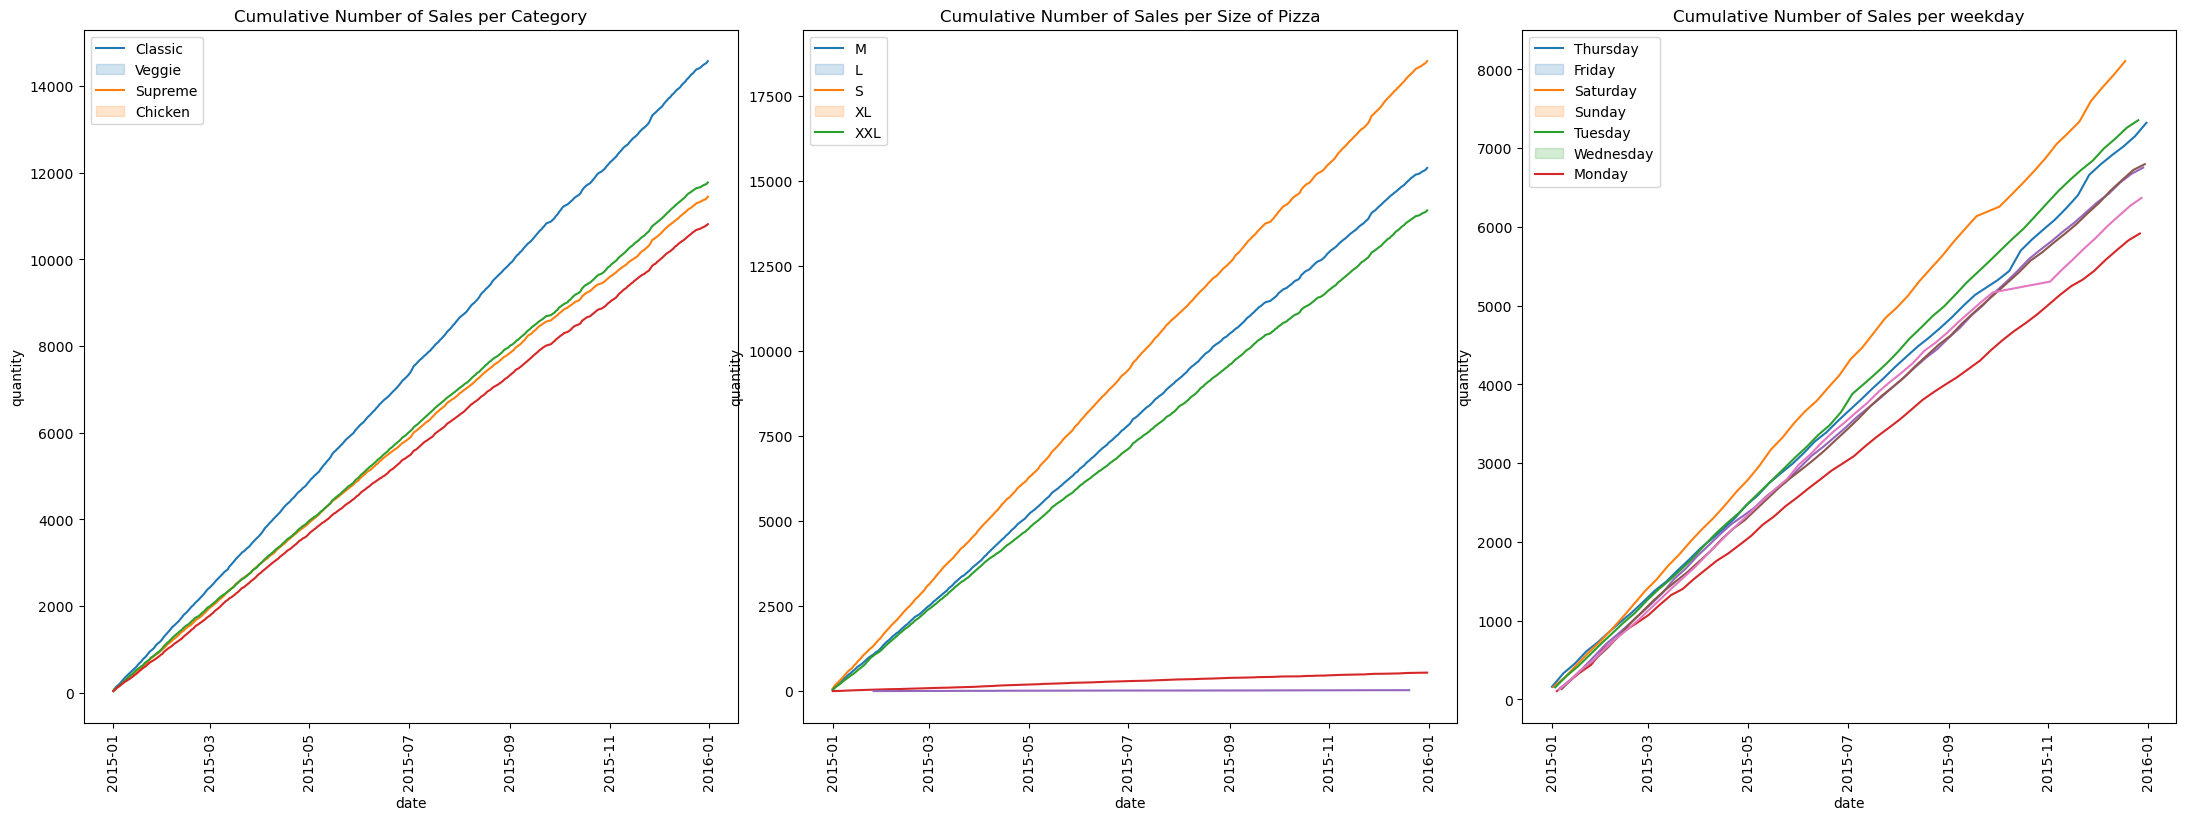

In [224]:
plt.figure(figsize = (27,9))
plt.subplots_adjust(wspace = 0.1)

#graphing category vs date
dfbyCatOrderDate = df.groupby(['category','date'])
# dfbyCatOrderDate
plt.subplot(131).title.set_text('Cumulative Number of Sales per Category')
plt.xticks(rotation=90) 
for cat in categories:
    data = dfbyCatOrderDate['quantity'].count()[cat]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(131))
plt.legend(categories)

#graphing size vs date
dfbySizeOrderDate = df.groupby(['size','date'])
plt.subplot(132).title.set_text('Cumulative Number of Sales per Size of Pizza')
plt.xticks(rotation=90)
for size in sizes:
    data = dfbySizeOrderDate['quantity'].count()[size]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(132))
plt.legend(sizes)


#graphing name vs date
#graphing 'Sales' vs. 'Region'
dfbyWeekdayOrderDate = df.groupby(['weekday','date'])
plt.subplot(133).title.set_text('Cumulative Number of Sales per weekday')
plt.xticks(rotation=90)
for weekday in weekdays:
    data = dfbyWeekdayOrderDate['quantity'].count()[weekday]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(133))
plt.legend(weekdays)
# plt.hue(weekdays)

plt.show()

- We can see that the sales of pizza have increased over the years indicating that the pizza shop business is doing well and might also be profitable. Looking at the graph we can also infer that at the end of each year there is rise in the sales, attributing to the fact that it is holiday season around this time. 

## Model building

In [225]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [226]:
df_org = df.copy()

In [227]:
df = df.drop(['datetime','hour','date'], axis=1)
for col in df.select_dtypes('object').columns:
    l_enc = LabelEncoder()
    df[col+'_encoded'] = l_enc.fit_transform(df[col])
    df.drop(col,axis = 1, inplace = True) 
    

X = df.drop('price',axis = 1)
y = df['price']

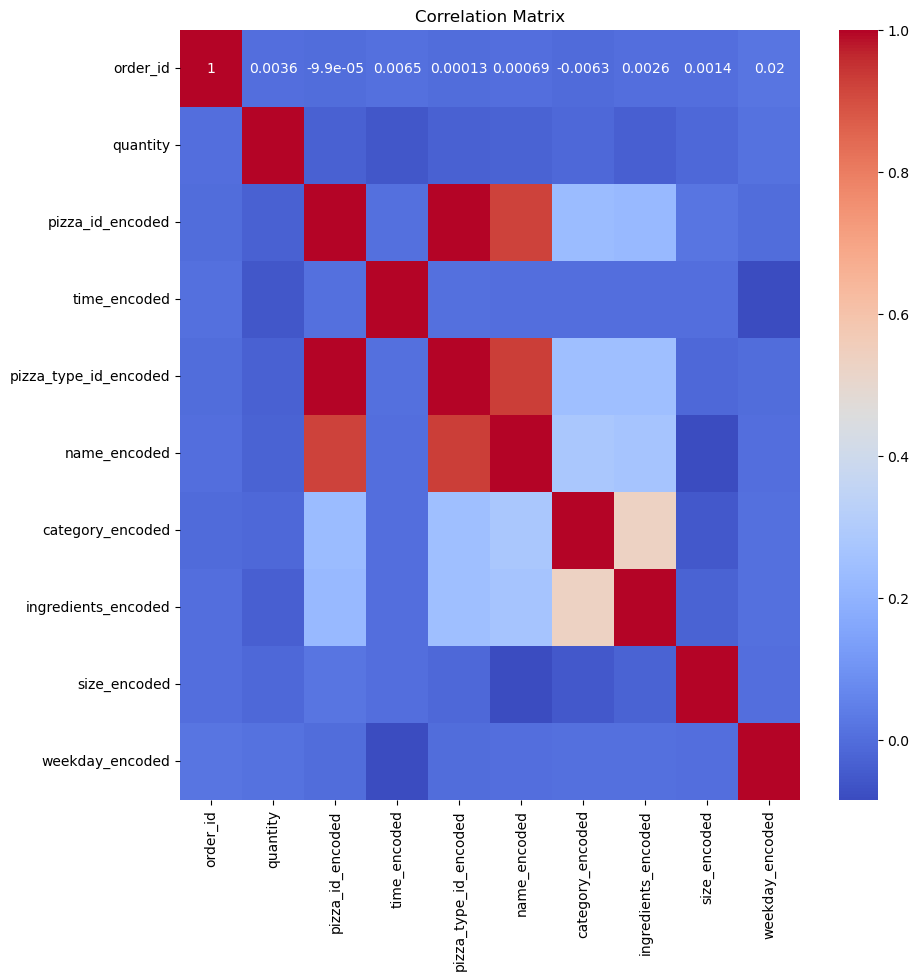

In [228]:
plt.figure(figsize=(10, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [229]:
X.shape

(48620, 10)

In [230]:
y.shape

(48620,)

#### Below I have created some helper functions. These are used to showcase the ouput in a systematic manner.

In [231]:
models_results_rmse = {}
models_results_r2 = {}

def evaluate(y_t, y_p, title):
    table = PrettyTable()
    table.field_names = ['Metric', 'Value']
    
    rmse = mean_squared_error(y_t, y_p, squared=False).round(4)
    r2 = r2_score(y_t, y_p).round(4)
    
    table.add_row(['RMSE', rmse])
    table.add_row(['R2 Score', r2])
    
    models_results_rmse[title] = rmse
    models_results_r2[title] = r2
    
    print(table)
    

In [232]:
def plot_forecasted_income(y_pred, y_train, y_true=[], period=5, title=''):
    
    # plot
    plt.figure(figsize=(20, 8))
    plt.plot(y_train.to_list(), color=colors[0])
    plt.plot([None for i in y_train] + [x for x in y_pred], color=colors[2])
    
    # set legend
    if len(y_true) > 0:
        plt.plot([None for i in y_train] + [x for x in y_true], color=colors[1])
        plt.legend(['Acual INCOME', 'Acual INCOME', f'2017 Forecasted INCOME \
(RMSE = {mean_squared_error(y_true, y_pred, squared=False).round(1)}, R2 = {r2_score(y_true, y_pred).round(3)})'])
    else:
        plt.legend(['Actual PRICE', 'Forecasted PRICE'])
    
    # set parameters
    plt.xticks(range(0, len(y_train) + len(y_pred), period), rotation=75)
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title(title)
    plt.show()

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## linear regression

In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [235]:
modelLR = LinearRegression() 
modelLR.fit(X_train, y_train)
y_pred = modelLR.predict(X_test)

evaluate(y_test, y_pred, title='Linear Regression')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 2.1841 |
| R2 Score | 0.6375 |
+----------+--------+


## DecisionTreeRegresor

In [236]:
from sklearn.tree import DecisionTreeRegressor

modelDTR = DecisionTreeRegressor(max_depth=3)
modelDTR.fit(X_train, y_train)
y_pred = modelDTR.predict(X_test)

evaluate(y_test, y_pred, title = 'DecisionTreeRegressor')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 1.5648 |
| R2 Score | 0.8139 |
+----------+--------+


## RandomForestRegressor

In [237]:
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor(max_depth=3)
modelRFR.fit(X_train, y_train)
y_pred = modelRFR.predict(X_test)

evaluate(y_test, y_pred, title = 'RandomForestRegressor')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 1.5584 |
| R2 Score | 0.8154 |
+----------+--------+


## Support Vector Regressor

In [238]:
from sklearn.svm import SVR

modelSVR = SVR()
modelSVR.fit(X_train, y_train)
y_pred = modelSVR.predict(X_test)

evaluate(y_test, y_pred, title = 'Support Vector Regressor')

+----------+---------+
|  Metric  |  Value  |
+----------+---------+
|   RMSE   |  3.628  |
| R2 Score | -0.0003 |
+----------+---------+


## XGBRegressor

In [239]:
from xgboost import XGBRegressor
modelXGB = XGBRegressor()
modelXGB.fit(X_train, y_train)
y_pred = modelXGB.predict(X_test)

evaluate(y_test, y_pred, title = 'XGBRegressor')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 0.0001 |
| R2 Score |  1.0   |
+----------+--------+


## Conclusion

#### Model evaluation - R2 Score

<Figure size 2000x800 with 0 Axes>

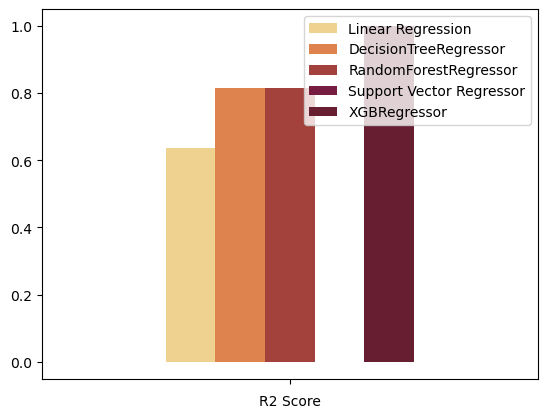

In [240]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_r2, index=['']).plot.bar(color=colors2);
plt.xlabel('R2 Score');

#### Model evaluation - Root Mean Square Error

<Figure size 2000x800 with 0 Axes>

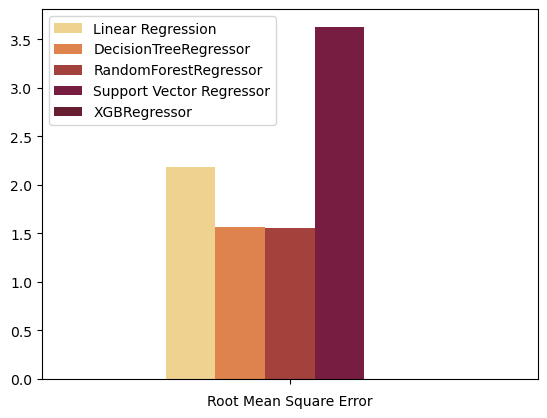

In [241]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_rmse, index=['']).plot.bar(color=colors2);
plt.xlabel('Root Mean Square Error');

### Final Forecasting using best performed model (Random Forest Regression)

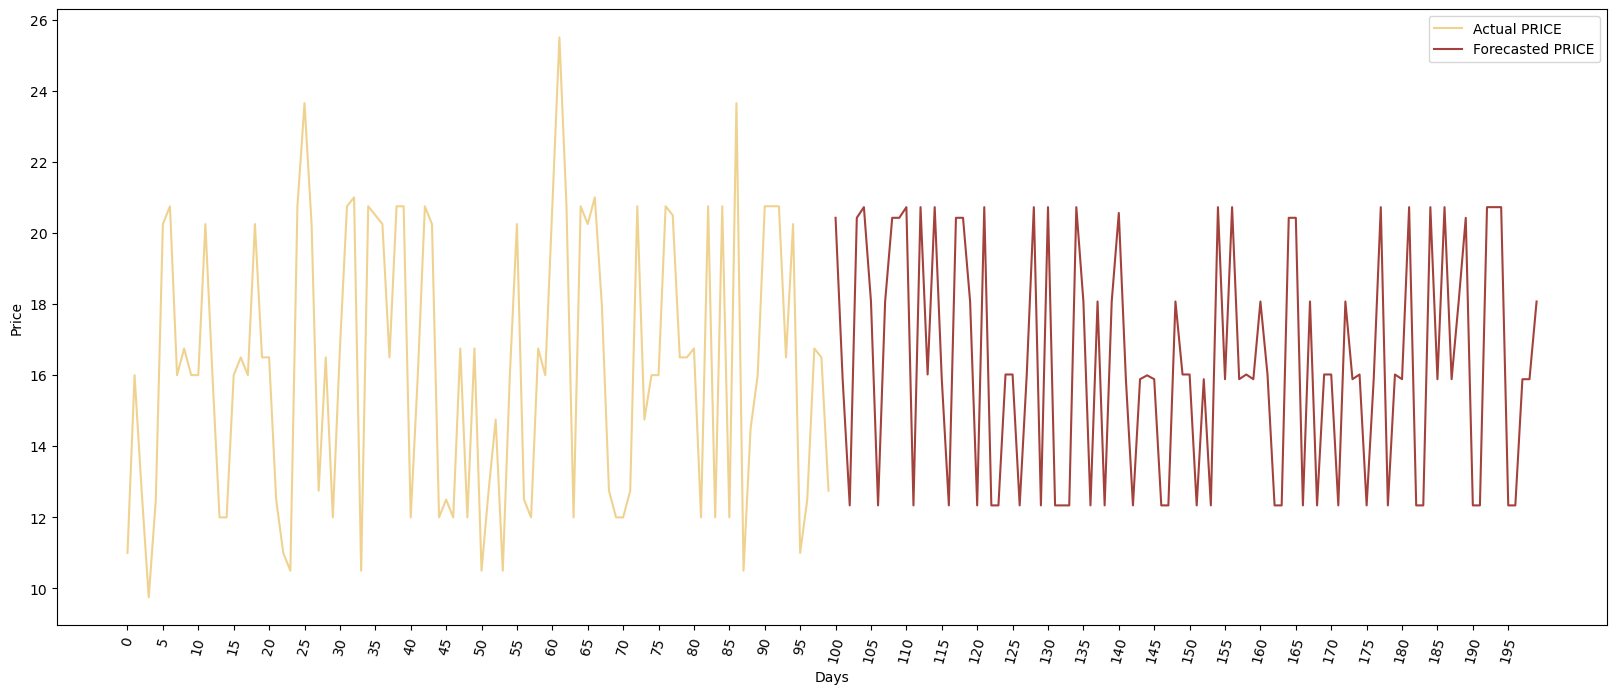

In [242]:
modelRFR = RandomForestRegressor(max_depth=3)
modelRFR.fit(X_train, y_train)
y_pred = modelRFR.predict(X_test)
plot_forecasted_income(y_pred[:100],y_train[:100])

In [243]:
df

,order_id,quantity,price,pizza_id_encoded,time_encoded,pizza_type_id_encoded,name_encoded,category_encoded,ingredients_encoded,size_encoded,weekday_encoded
0,1,1,13.25,27,415,11,12,1,22,1,4
1,77,1,13.25,27,1644,11,12,1,22,1,0
2,146,1,13.25,27,5037,11,12,1,22,1,2
3,163,1,13.25,27,8312,11,12,1,22,1,2
4,247,1,13.25,27,14649,11,12,1,22,1,3
...,...,...,...,...,...,...,...,...,...,...,...
48615,17492,1,35.95,87,11865,30,10,1,14,4,2
48616,18139,1,35.95,87,14135,30,10,1,14,4,4
48617,18789,1,35.95,87,126,30,10,1,14,4,5
48618,18919,1,35.95,87,8415,30,10,1,14,4,4


## Forward Selection Method

In [244]:
X

,order_id,quantity,pizza_id_encoded,time_encoded,pizza_type_id_encoded,name_encoded,category_encoded,ingredients_encoded,size_encoded,weekday_encoded
0,1,1,27,415,11,12,1,22,1,4
1,77,1,27,1644,11,12,1,22,1,0
2,146,1,27,5037,11,12,1,22,1,2
3,163,1,27,8312,11,12,1,22,1,2
4,247,1,27,14649,11,12,1,22,1,3
...,...,...,...,...,...,...,...,...,...,...
48615,17492,1,87,11865,30,10,1,14,4,2
48616,18139,1,87,14135,30,10,1,14,4,4
48617,18789,1,87,126,30,10,1,14,4,5
48618,18919,1,87,8415,30,10,1,14,4,4


In [245]:
X = X.drop(['time_encoded','order_id','pizza_type_id_encoded'], axis = 1)

In [246]:
X

,quantity,pizza_id_encoded,name_encoded,category_encoded,ingredients_encoded,size_encoded,weekday_encoded
0,1,27,12,1,22,1,4
1,1,27,12,1,22,1,0
2,1,27,12,1,22,1,2
3,1,27,12,1,22,1,2
4,1,27,12,1,22,1,3
...,...,...,...,...,...,...,...
48615,1,87,10,1,14,4,2
48616,1,87,10,1,14,4,4
48617,1,87,10,1,14,4,5
48618,1,87,10,1,14,4,4


In [247]:
df.isnull().sum()

order_id                 0
quantity                 0
price                    0
pizza_id_encoded         0
time_encoded             0
pizza_type_id_encoded    0
name_encoded             0
category_encoded         0
ingredients_encoded      0
size_encoded             0
weekday_encoded          0
dtype: int64

In [248]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [258]:
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [259]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2024-08-06 18:04:47] Features: 1/5 -- score: -6.6930516254583825[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2024-08-06 18:04:47] Features: 2/5 -- score: -6.51002270755239[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2024-08-06 18:04:47] Features: 3/5 -- score: -6.509202663189177[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [260]:
new_col = list(sfs1.k_feature_names_)
print(new_col)

['quantity', 'category_encoded', 'ingredients_encoded', 'size_encoded', 'weekday_encoded']


In [261]:
y

0        13.25
1        13.25
2        13.25
3        13.25
4        13.25
         ...  
48615    35.95
48616    35.95
48617    35.95
48618    35.95
48619    35.95
Name: price, Length: 48620, dtype: float64

In [262]:
# new_pizza_df = df_org[new_col]
# new_data['price'] = df['price']
# df

KeyError: "['category_encoded', 'ingredients_encoded', 'size_encoded', 'weekday_encoded'] not in index"

In [254]:
df_org

,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price,datetime,hour,weekday
0,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-01 11:38:36,11,Thursday
1,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-02 12:22:46,12,Friday
2,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-03 14:22:10,14,Saturday
3,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-03 16:54:54,16,Saturday
4,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,2015-01-04 20:55:29,20,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,17492,the_greek_xxl,1,2015-10-24,18:58:20,the_greek,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",XXL,35.95,2015-10-24 18:58:20,18,Saturday
48616,18139,the_greek_xxl,1,2015-11-05,20:28:52,the_greek,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",XXL,35.95,2015-11-05 20:28:52,20,Thursday
48617,18789,the_greek_xxl,1,2015-11-17,11:23:51,the_greek,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",XXL,35.95,2015-11-17 11:23:51,11,Tuesday
48618,18919,the_greek_xxl,1,2015-11-19,16:58:26,the_greek,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",XXL,35.95,2015-11-19 16:58:26,16,Thursday


In [257]:
df

,order_id,quantity,price,pizza_id_encoded,time_encoded,pizza_type_id_encoded,name_encoded,category_encoded,ingredients_encoded,size_encoded,weekday_encoded
0,1,1,13.25,27,415,11,12,1,22,1,4
1,77,1,13.25,27,1644,11,12,1,22,1,0
2,146,1,13.25,27,5037,11,12,1,22,1,2
3,163,1,13.25,27,8312,11,12,1,22,1,2
4,247,1,13.25,27,14649,11,12,1,22,1,3
...,...,...,...,...,...,...,...,...,...,...,...
48615,17492,1,35.95,87,11865,30,10,1,14,4,2
48616,18139,1,35.95,87,14135,30,10,1,14,4,4
48617,18789,1,35.95,87,126,30,10,1,14,4,5
48618,18919,1,35.95,87,8415,30,10,1,14,4,4


In [263]:
new_pizza_df['price'] = df['price'] 

In [264]:
new_pizza_df.to_csv("new_pizza_df.csv")

In [265]:
new_pizza_df

,quantity,category_encoded,ingredients_encoded,size_encoded,weekday_encoded,price
0,1,1,22,1,4,13.25
1,1,1,22,1,0,13.25
2,1,1,22,1,2,13.25
3,1,1,22,1,2,13.25
4,1,1,22,1,3,13.25
...,...,...,...,...,...,...
48615,1,1,14,4,2,35.95
48616,1,1,14,4,4,35.95
48617,1,1,14,4,5,35.95
48618,1,1,14,4,4,35.95


## Pickleing Models and Transformers

In [ ]:
prin()

In [ ]:
# data analysis packages
import pandas as pd
import numpy as np

#encoding and pickle packages
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
df  = pd.read_csv('final_pizza.csv',index_col= 0)
# df = df.drop(['datetime','time','hour','date'], axis=1)
df = df.drop(['time','date'], axis=1)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
sample_li = [357, 'hawaiian_m',1,'hawaiian','The Hawaiian Pizza','Classic','Sliced Ham, Pineapple, Mozzarella Cheese','M','Friday']
sample = np.array(sample_li)
sample

In [ ]:

li = []

li.append(int(sample[0]))
# li.append(int(sample[1]))
li.append(int(sample[2]))

f1 = open('pizza_id.pkl','rb')
l_enc1 = pickle.load(f1)
li.append((l_enc1.transform([sample[1]]))[0])


f2 = open('pizza_type_id.pkl','rb')
l_enc2 = pickle.load(f2)
li.append((l_enc2.transform([sample[3]]))[0])

f3 = open('name.pkl','rb')
l_enc3 = pickle.load(f3)
li.append(l_enc3.transform([sample[4]])[0])

f4 = open('category.pkl','rb')
l_enc4 = pickle.load(f4)
li.append(l_enc4.transform([sample[5]])[0])

f5 = open('ingredients.pkl','rb')
l_enc5 = pickle.load(f5)
li.append((l_enc5.transform([sample[6]]))[0])

f6 = open('size.pkl','rb')
l_enc6 = pickle.load(f6)
li.append(l_enc6.transform([sample[7]])[0])

f7 = open('weekday.pkl','rb')
l_enc7 = pickle.load(f7)
li.append(l_enc7.transform([sample[8]])[0])

encoded_sample = np.array([li])
encoded_sample

## Forward Feature Selection